In [44]:
%pylab inline
import json
import numpy as np
import pandas as pd
import sklearn.manifold as manifold
import sklearn.cluster as cluster
import sklearn.preprocessing as preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import hdbscan
import seaborn as sns
import os
import itertools
from operator import itemgetter
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
def parse_data_file(path):
    data = []
    with open(path, 'r') as fp:
        for line in fp:
            point = json.loads(line)
            text = point['text']
            data.append(text)
    return data

In [40]:
set_of_words = set()
#typical stop words....from https://kb.yoast.com/kb/list-stop-words/
stop_list = set([ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are",\
                 "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by",\
                 "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further",\
                 "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself",\
                 "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it",\
                 "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only",\
                 "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll",\
                 "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them",\
                 "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've",\
                 "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll",\
                 "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who",\
                 "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your",\
                 "yours", "yourself", "yourselves"])

for tweet in parse_data_file('tweets.json'):
    for word in map(lambda x: x.lower(),tweet.split()): #make sure to ignore case
        if word in stop_list or 'http' in word:
            continue
        elif word in set_of_words:
            continue
        else:
            set_of_words.add(word)

dic_of_words = {}
veclength = len(set_of_words) # this will be length of each vector that represents a tweet
numtweets = len(parse_data_file('tweets.json'))
for index,word in enumerate(set_of_words):
    dic_of_words[word] = index
veclength,numtweets

(377, 251)

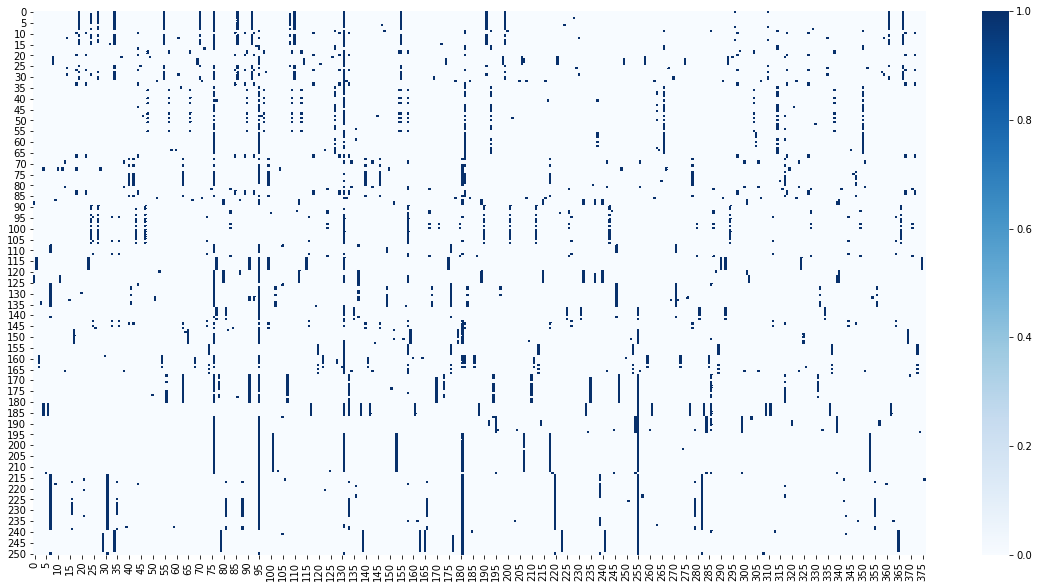

In [42]:
features = np.zeros((numtweets,veclength)) # creates numpy matrix to house features
##################################################
for tindex,tweet in enumerate(parse_data_file('tweets.json')):
    for word in map(lambda x: x.lower(),tweet.split()):
        if word in stop_list or 'http' in word:
            continue
        else:
            features[tindex][dic_of_words[word]] = 1
plt.figure(figsize=(20,10))
sns.heatmap(features,cmap='Blues')

Text(0.5,1,'Elbow curve')

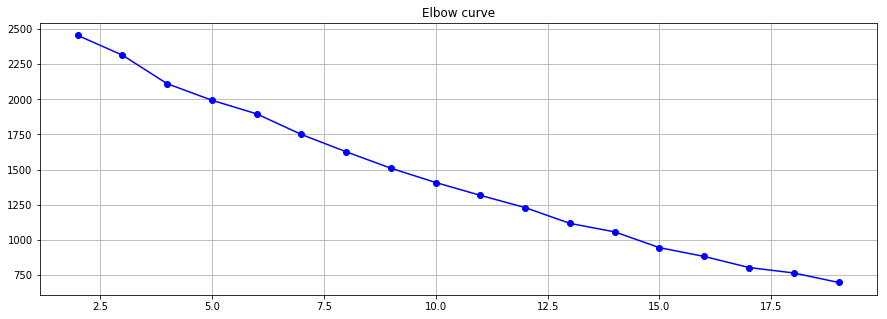

In [43]:
X = features
distorsions = []
for k in range(2, 20):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions, 'bo-')
plt.grid(True)
plt.title('Elbow curve')

In [52]:
corpus = parse_data_file('tweets.json')
vectorizer = CountVectorizer()
vectorizer.fit_transform(corpus).todense()
# vectorizer.stop_words

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Text(0.5,1,'Elbow curve')

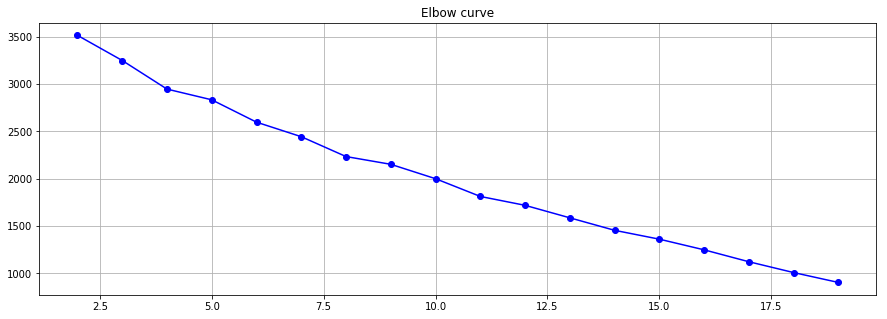

In [53]:
corpus = parse_data_file('tweets.json')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).todense()
distorsions = []
for k in range(2, 20):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions, 'bo-')
plt.grid(True)
plt.title('Elbow curve')